In [4]:
import os 
import cv2
import matplotlib.pyplot as plt
import csv
import numpy as np

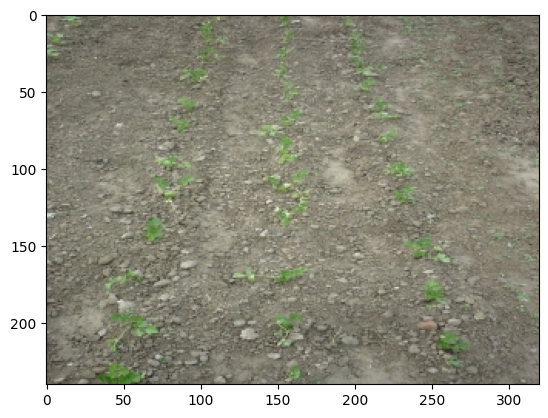

In [5]:
imageName = 'crop_row_001.JPG'
imagePath = '/home/roxane/Desktop/M3_2022/Caterra/dataset_straigt_lines/'
imageHeight, imageWidth = [240, 320]
halfWidth = imageWidth/2;
GTImage = cv2.imread(os.path.join(imagePath, imageName))
plt.imshow(cv2.cvtColor(GTImage, cv2.COLOR_BGR2RGB))

In [6]:
link = '/home/roxane/Desktop/M3_2022/Caterra/TryDataSet/crop_row_001.crp'
with open (link, 'r') as f:
    cv = [row[0] for row in csv.reader(f,delimiter='\t')]
with open (link, 'r') as f:
    dv = [row[1] for row in csv.reader(f,delimiter='\t')]
    #first image row where crop rows are present
v0 = imageHeight - np.shape(dv)[0] + 1

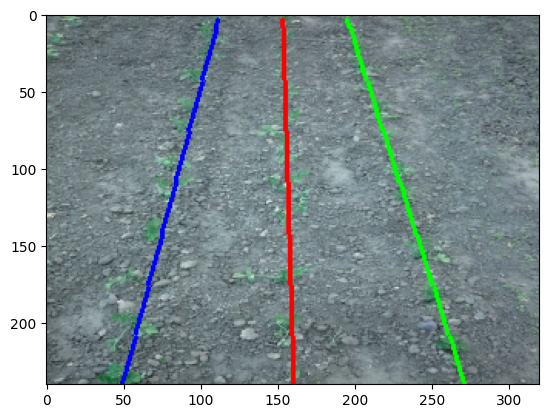

In [9]:
cop = np.copy(GTImage)

for v in range(v0, imageHeight):
    c_int = int(float(cv[v-v0]))
    d_int = int(float(dv[v-v0]))

    #print(v,halfWidth + c_int)
    c_tot_1 = int(halfWidth + c_int)
    #c_tot_2 = int(halfWidth + c_int - d_int)

    p1 = (c_tot_1, v)
    p2 = (c_tot_1 + d_int, v)
    p3 = (c_tot_1 - d_int, v)
    #p4 = (c_tot_1 - 2*d_int, v)

    cv2.circle(cop, p1, 1, (255,0,0), 1)
    cv2.circle(cop, p2, 1, (0,255,0), 1)
    cv2.circle(cop, p3, 1, (0,0, 255), 1)
    #cv2.circle(cop, p4, 1, (0,255, 255), 1)

plt.imshow(cop)


In [10]:
path_my_results = '/home/roxane/Desktop/M3_2022/Caterra/PyCode_2/readme.txt'
with open (path_my_results, 'r') as f:
    cv_myresult = [row for row in csv.reader(f)]
    
array = np.zeros((imageHeight,8))
for idx_line, line in enumerate(cv_myresult):
    for idx_row, row in enumerate(line) :
        b = int(row.strip(']').strip('[').strip(' (').strip(')'))
        array[idx_line, idx_row] = b

In [11]:
m, sigma, result, test = [3, 0.2, 0, 0]

for v in range(v0, imageHeight):
    c_GT = int(float(cv[v-v0]))
    d_GT = int(float(dv[v-v0]))

    #print(v,halfWidth + c_GT)
    for i in range(-1,3) : 
        u = array[v][2*(i+1)] # int(halfWidth + c_GT) + i*d_GT  # array[v][2*(i+1)] #int(halfWidth + c_GT) + i*d_GT 
        u_GT = int(halfWidth + c_GT) + i*d_GT
        diff = u_GT-u
        test = test + diff
        #print(u_GT, array[v][2*(i+1)])
        t = pow((diff/(sigma*d_GT)),2)
        s = max(1-t,0)
        result = result + s
        
mean = test/(3*(imageHeight-v0))
prec = 100*(mean/imageWidth)
print('score : ', result, '\naverage precision : ', 100 - prec, '%')


score :  601.4281923924688 
average precision :  66.96246483825598 %


In [30]:
m, sigma, result, test = [3, 0.2, 0, 0]

for v in range(v0, imageHeight):
    c_GT = int(float(cv[v-v0]))
    d_GT = int(float(dv[v-v0]))

    #print(v,halfWidth + c_GT)
    for i in range(-1,3) : 
        u = array[v][2*(i+1)] # int(halfWidth + c_GT) + i*d_GT  # array[v][2*(i+1)] #int(halfWidth + c_GT) + i*d_GT 
        u_GT = int(halfWidth + c_GT) + i*d_GT
        diff = u_GT-u
        test = test + diff
        #print(u_GT, array[v][2*(i+1)])
        t = pow((diff/(sigma*d_GT)),2)
        s = max(1-t,0)
        result = result + s
        
mean = test/(3*(imageHeight-v0))
prec = 100*(mean/imageWidth)
print('score : ', result, '\naverage precision : ', 100 - prec, '%')


score :  662.6368346653919 
average precision :  98.13637955182072 %
